# 03_reproduc_figs

Warning message in dir.create(write_output_base_path):
“'output/reproduc' already exists”Loading required package: colorout
Loading required package: assertthat
Loading required package: staggefuncs
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ tibble::has_name() masks assertthat::has_name()
✖ dplyr::lag()       masks stats::lag()
Loading required package: colorblindr
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘colorblindr’”Loading required package: ggridges
Loading required package: ggthemes
Loading required package: riverplot
Loading required package: tspmeta
Loa

named list()

named list()

Warning message in dir.create(file.path(write_figures_path, "png"), recursive = TRUE):
“'output/reproduc/figures/png' already exists”Warning message in dir.create(file.path(write_figures_path, "pdf"), recursive = TRUE):
“'output/reproduc/figures/pdf' already exists”Warning message in dir.create(file.path(write_figures_path, "svg"), recursive = TRUE):
“'output/reproduc/figures/svg' already exists”

[1] "grey30"  "#228833" "grey30"  "#66CCEE" "grey30"  "#4477AA" "grey30" 
 [8] "#EE6677" "grey30"  "#CCBB44" "grey30"  "#AA3377"

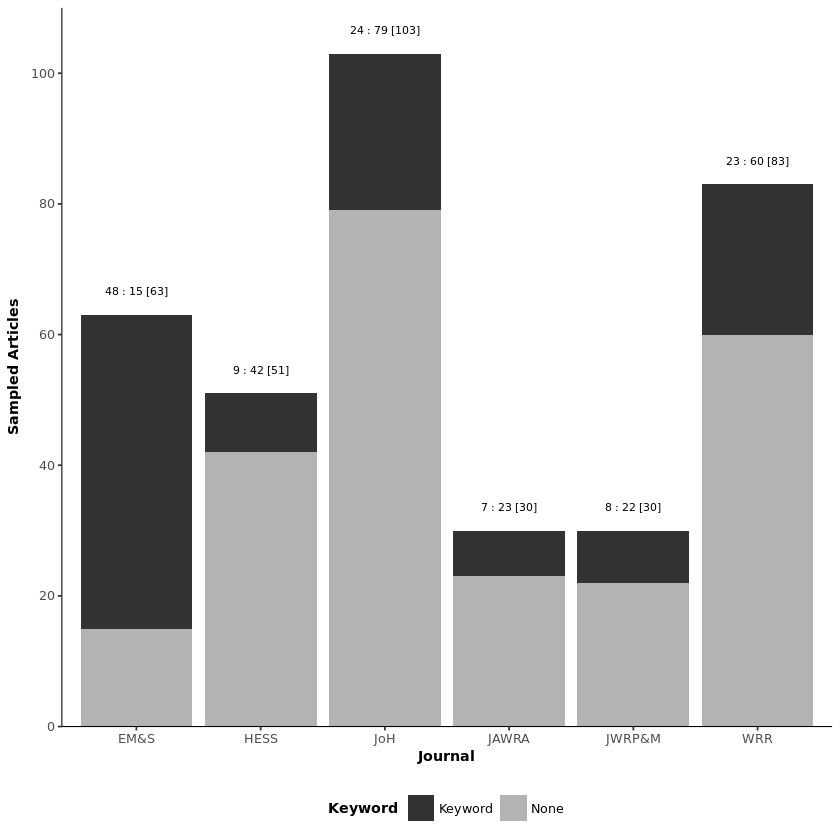

ERROR: Error in cvd_grid(p): could not find function "cvd_grid"


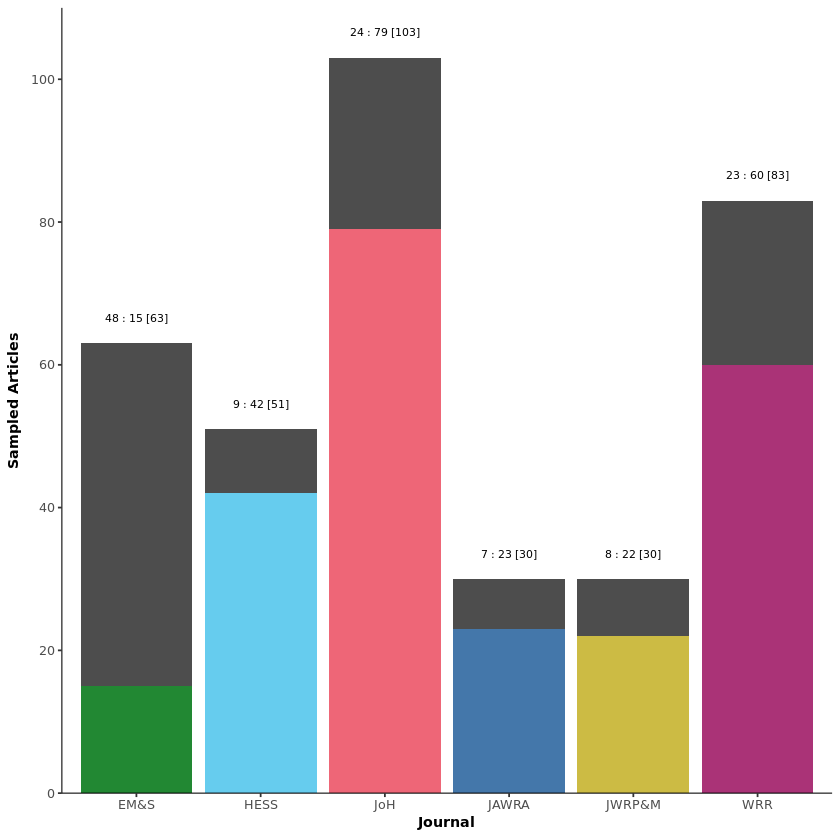

In [1]:
# *------------------------------------------------------------------
# | PROGRAM NAME: 03_ap_model_fit
# | FILE NAME: 03_ap_model_fit.R
# | DATE: 
# | CREATED BY:  Jim Stagge         
# *----------------------------------------------------------------
# | PURPOSE:  This is a code wrapper to fit the Annual Percentile (AP) model.
# | It fits cumulative probability distributions for annual and monthly flows.
# |
# |
# *------------------------------------------------------------------
# | COMMENTS:               
# |
# |  1:  
# |  2: 
# |  3: 
# |*------------------------------------------------------------------
# | DATA USED:               
# | USGS gauge flow data
# | Annual reconstructions from:
# | Allen, E.B., Rittenour, T.M., DeRose, R.J., Bekker, M.F., Kjelgren, R., Buckley, B.M., 2013. A tree-ring based reconstruction of Logan River streamflow, northern Utah. Water Resources Research 49, 8579–8588. doi:10.1002/2013WR014273.
# |
# | DeRose, R.J., Bekker, M.F., Wang, S.Y., Buckley, B.M., Kjelgren, R.K., Bardsley, T., Rittenour, T.M., Allen, E.B., 2015. A millennium-length reconstruction of Bear River stream flow, Utah. Journal of Hydrology 529, Part 2, 524–534. doi:10.1016/j.jhydrol.2015.01.014.
# |
# |*------------------------------------------------------------------
# | CONTENTS:               
# |
# |  PART 1:  
# |  PART 2: 
# |  PART 3: 
# *-----------------------------------------------------------------
# | UPDATES:               
# |
# |
# *------------------------------------------------------------------

### Clear any existing data or functions.
rm(list=ls())

###########################################################################
## Set the Paths
###########################################################################
### Path for Data and Output	
data_path <- "data"
output_path <- "output"
global_path <- "../global_func"
function_path <- "./functions"

### Set output location
output_name <- "reproduc"
write_output_base_path <- file.path(output_path, output_name)

dir.create(write_output_base_path)

### Set input location
data_path<- file.path(data_path)

###########################################################################
###  Load functions
###########################################################################
### Load these functions for all code
require(colorout)
require(assertthat)
require(staggefuncs)
require(tidyverse)
require(colorblindr)

### Load these functions for this unique project
require(stringr)
require(ggridges)
require(ggthemes)
require(riverplot)
require(tspmeta)
### Fix the select command
select <- dplyr::select

### Load project specific functions
file.sources = list.files(function_path, pattern="*.R", recursive=TRUE)
sapply(file.path(function_path, file.sources),source)

### Load global functions
file.sources = list.files(global_path, pattern="*.R", recursive=TRUE)
sapply(file.path(global_path, file.sources),source)



###########################################################################
## Set Initial Values
###########################################################################

journal_abbrev <- c("EM&S", "HESS", "JoH", "JAWRA", "JWRP&M", "WRR")
journal_colors <- cb_pal("custom", n=6, sort=FALSE)
journal_colors <- journal_colors[c(1, 2, 4, 3, 5, 6)]

###########################################################################
## Set Additional Output Folders
###########################################################################
### Set up output folders
write_figures_path <- file.path(write_output_base_path, "figures")
dir.create(file.path(write_figures_path,"png"), recursive=TRUE)
dir.create(file.path(write_figures_path,"pdf"), recursive=TRUE)
dir.create(file.path(write_figures_path,"svg"), recursive=TRUE)



###########################################################################
## Load data
###########################################################################
load(file=file.path(write_output_base_path, "reproduc_data.rda"))



###########################################################################
## Create column with availability / reproducibility testing
###########################################################################
reproduc_df <- reproduc_df %>%
	mutate(rep_avail_clean = case_when(
		rep_avail == "repro" ~ "repro",
		TRUE ~ "avail")
	)
                           
###########################################################################
###  Plot keywords by Journal
###########################################################################
plot_articles_sample <- reproduc_df %>%
	filter(rep_avail_clean == "avail") %>%
 	select(keyword, Q2_abbrev) %>%
 	group_by(Q2_abbrev, keyword) %>% 
 	summarise(count = n())

plot_articles_sample$keyword <- factor(plot_articles_sample$keyword, levels=c(TRUE, FALSE), labels=c("Keyword", "None"))

### Create a table for labels
plot_articles_sample_spread <- plot_articles_sample %>% 
	spread(keyword, count) %>%
	mutate(Total = Keyword + None)
#pub_table$labels <- paste0(pub_table$total, " [", pub_table$keyword, " : ", pub_table$none,"]")
plot_articles_sample_spread$labels <- paste0(plot_articles_sample_spread$Keyword, " : ", plot_articles_sample_spread$None," [", plot_articles_sample_spread$Total, "]")
#pub_table$labels <- paste0(" [", pub_table$total, "] ", pub_table$keyword, " : ", pub_table$none)
	
### Plot black and white
  p <- ggplot(data = plot_articles_sample, aes(x = Q2_abbrev)) 
  p <- p + geom_bar(aes(y = count, fill = keyword), stat = 'identity')
  p <- p + geom_text(data=plot_articles_sample_spread, aes(y = Total + 3, label=labels), vjust=0, size=2.3)
  p <- p + scale_y_continuous(name="Sampled Articles", expand = c(0, 0), limits=c(0,110), breaks=seq(0,160,20))
  p <- p + scale_x_discrete(name="Journal")
  p <- p + scale_fill_manual(name="Keyword", values=c("grey20", "grey70"))
  p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
  p 
  
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "article_sample_keyword_by_journal", "_bw.png"), p, width=5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "article_sample_keyword_by_journal", "_bw.svg"), p, width=5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "article_sample_keyword_by_journal", "_bw.pdf"), p, width=5, height=3)

	
plot_articles_sample$fill <- paste0(plot_articles_sample$Q2_abbrev, "--", plot_articles_sample$keyword)

journal_colors_black <- rep(journal_colors, each=2)
journal_colors_black[seq(1, length(journal_colors_black), 2)] <- "grey30"
journal_colors_black

### Plot as separate bars 
  p <- ggplot(data = plot_articles_sample, aes(x = Q2_abbrev)) 
  p <- p + geom_bar(aes(y = count, fill = fill), stat = 'identity')
  p <- p + geom_text(data=plot_articles_sample_spread, aes(y = Total + 3, label=labels), vjust=0, size=2.3)
  p <- p + scale_y_continuous(name="Sampled Articles", expand = c(0, 0), limits=c(0,110), breaks=seq(0,160,20))
  p <- p + scale_x_discrete(name="Journal")
  p <- p + scale_fill_manual(name="Keyword", values=journal_colors_black)
  p <- p + theme_classic_new(9.5) +   theme(legend.position="none")
  p 
   
  cvd_grid(p)

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "article_sample_keyword_by_journal", "_color.png"), p, width=5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "article_sample_keyword_by_journal", "_color.svg"), p, width=5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "article_sample_keyword_by_journal", "_color.pdf"), p, width=5, height=3)


###########################################################################
## Plot population papers by keyword
###########################################################################
pub_summary_table$keyword_prop <- pub_summary_table$keyword / pub_summary_table$total
#pub_table$labels <- paste0(pub_table$total, " [", pub_table$keyword, " : ", pub_table$none,"]")
pub_summary_table$labels <- paste0(pub_summary_table$keyword, " : ", pub_summary_table$none," [", pub_summary_table$total, "]")
#pub_table$labels <- paste0(" [", pub_table$total, "] ", pub_table$keyword, " : ", pub_table$none)

plot_articles_population <- pub_summary_table %>%
 	select(-journal, -X, -total, -labels, -keyword_prop) %>%
 	gather(keyword, count, -journal_abbrev)

plot_articles_population$keyword[plot_articles_population$keyword == "keyword"] <- "Keyword"
plot_articles_population$keyword[plot_articles_population$keyword == "none"] <- "None"


### Plot black and white
  p <- ggplot(data = plot_articles_population, aes(x = journal_abbrev)) 
  p <- p + geom_bar(aes(y = count, fill = keyword), stat = 'identity')
  p <- p + geom_text(data=pub_summary_table, aes(y = total + 10, label=labels), vjust=0, size=2.3)
  p <- p + scale_y_continuous(name="Articles in 2017", expand = c(0, 0), limits=c(0,720), breaks=seq(0,800,200))
  p <- p + scale_x_discrete(name="Journal")
  p <- p + scale_fill_manual(name="Keyword", values=c("grey20", "grey70"))
  p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
  p 
  
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "article_keyword_by_journal", "_bw.png"), p, width=5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "article_keyword_by_journal", "_bw.svg"), p, width=5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "article_keyword_by_journal", "_bw.pdf"), p, width=5, height=3)


plot_articles_population$fill <- paste0(plot_articles_population$journal_abbrev, "--", plot_articles_population$keyword)

journal_colors <- cb_pal("custom", n=6, sort=FALSE)
journal_colors <- journal_colors[c(1, 2, 4, 3, 5, 6)]

journal_colors_black <- rep(journal_colors, each=2)
journal_colors_black[seq(1, length(journal_colors_black), 2)] <- "grey30"
journal_colors_black

### Plot using same colors
  p <- ggplot(data = plot_articles_population, aes(x = journal_abbrev)) 
  p <- p + geom_bar(aes(y = count, fill = fill), stat = 'identity')
  p <- p + geom_text(data=pub_summary_table, aes(y = total + 10, label=labels), vjust=0, size=2.3)
  p <- p + scale_y_continuous(name="Articles in 2017", expand = c(0, 0), limits=c(0,720), breaks=seq(0,800,200))
  p <- p + scale_x_discrete(name="Journal")
  p <- p + scale_fill_manual(name="Keyword", values=journal_colors_black)
  p <- p + theme_classic_new(9.5) +   theme(legend.position="none")
  p 

  cvd_grid(p)

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "article_keyword_by_journal", "_color.png"), p, width=5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "article_keyword_by_journal", "_color.svg"), p, width=5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "article_keyword_by_journal", "_color.pdf"), p, width=5, height=3)


###########################################################################
###  Create combined figure
###########################################################################
### Merge tables
plot_articles_join <- plot_articles_sample %>% 
	full_join(plot_articles_population, by= c("Q2_abbrev" = "journal_abbrev", "keyword" = "keyword")) %>%
	select(-fill.x, -fill.y) %>%
	as.data.frame()
### Rename columns
names(plot_articles_join) <- c("journal_abbrev", "keyword", "sample", "population")	
plot_articles_join

### Create a total column for plotting that sums non-keyword and keyword for stacking
plot_articles_join_total <- plot_articles_join %>% 
 	group_by(journal_abbrev) %>% 
 	summarise(sample = sum(sample), population = sum(population)) %>%
 	add_column( keyword = "Total", .after="journal_abbrev") %>%
 	as.data.frame()

plot_articles_join <- rbind(plot_articles_join, plot_articles_join_total)

### Make vertical table
yup <- plot_articles_join %>% 	
	gather(source, count, -journal_abbrev, -keyword)

ggplot(yup, aes(x=journal_abbrev, y=count, group=source, fill=keyword)) + geom_bar(stat = "identity",  position = "dodge")

to_plot <- subset(yup, keyword!="None")
to_plot$fill <- paste0(to_plot$journal_abbrev, "_", to_plot$source, "_", to_plot$keyword)
to_plot

journal_colors_light<- c("#88EE99","#9AFFFF","#AADDFF","#FFB3C4","#F3F385","#FF99DD")

journal_colors_black <- rep(journal_colors, each=4)
journal_colors_black[seq(1, length(journal_colors_black), 4)] <- "grey20"
journal_colors_black[seq(3, length(journal_colors_black), 4)] <- "grey20"
journal_colors_black[seq(4, length(journal_colors_black), 4)] <- journal_colors_light
journal_colors_black

  p <- ggplot(to_plot, aes(x=journal_abbrev, y=count, group=source, fill=fill)) 
  p <- p + geom_bar(data=subset(to_plot, keyword == "Total"), stat = "identity",  position = "dodge", colour="black", size=0.2)
    p <- p + geom_bar(data=subset(to_plot, keyword == "Keyword"), stat = "identity",  position = "dodge")
#  p <- p + geom_text(data=pub_summary_table, aes(y = total + 10, label=labels), vjust=0, size=2.3)
  p <- p + scale_y_continuous(name="Articles", expand = c(0, 0), limits=c(0,720), breaks=seq(0,800,100))
  p <- p + scale_x_discrete(name="Journal")
  #p <- p + scale_fill_manual(name="Keyword", values=journal_colors_black)
  p <- p + scale_fill_manual(name="Keyword", values=journal_colors_black)
  p <- p + theme_classic_new(9.5) +   theme(legend.position="none")
  p 

### Save figure

ggsave(paste0(file.path(write_figures_path,"png/"), "article_keyword_by_journal_combined", "_color.png"), p, width=5.5, height=3.5, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "article_keyword_by_journal_combined", "_color.svg"), p, width=5.5, height=3.5)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "article_keyword_by_journal_combined", "_color.pdf"), p, width=5.5, height=3.5)

cvd_grid(p)



journal_colors_black <- rep("grey60", each=4*6)
journal_colors_black[seq(1, length(journal_colors_black), 4)] <- "grey20"
journal_colors_black[seq(3, length(journal_colors_black), 4)] <- "grey20"
journal_colors_black[seq(4, length(journal_colors_black), 4)] <- "grey85"
journal_colors_black

  p <- ggplot(to_plot, aes(x=journal_abbrev, y=count, group=source, fill=fill)) 
  p <- p + geom_bar(data=subset(to_plot, keyword == "Total"), stat = "identity",  position = "dodge", colour="black", size=0.2)
    p <- p + geom_bar(data=subset(to_plot, keyword == "Keyword"), stat = "identity",  position = "dodge", colour="black", size=0.1)
#  p <- p + geom_text(data=pub_summary_table, aes(y = total + 10, label=labels), vjust=0, size=2.3)
  p <- p + scale_y_continuous(name="Articles", expand = c(0, 0), limits=c(0,720), breaks=seq(0,800,100))
  p <- p + scale_x_discrete(name="Journal")
  #p <- p + scale_fill_manual(name="Keyword", values=journal_colors_black)
  p <- p + scale_fill_manual(name="Keyword", values=journal_colors_black)
  p <- p + theme_classic_new(9.5) +   theme(legend.position="none")
  p 

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "article_keyword_by_journal_combined", "_bw.png"), p, width=5.5, height=3.5, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "article_keyword_by_journal_combined", "_bw.svg"), p, width=5.5, height=3.5)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "article_keyword_by_journal_combined", "_bw.pdf"), p, width=5.5, height=3.5)

###########################################################################
###  Plot Availability claim
###########################################################################

avail_journal <- reproduc_df %>% 
	filter(rep_avail_clean == "avail") %>%
	dplyr::select(Q2_abbrev, Q5) %>%
	count(Q2_abbrev, Q5) %>%  
	mutate(prop_all = prop.table(n)) %>%
	group_by(Q2_abbrev) %>% 
	mutate(prop_by_journal = n/sum(n)) %>% 
	as.data.frame()

### Reorder the levels for question Q5
avail_journal$Q5 <- factor(avail_journal$Q5, levels=levels(avail_journal$Q5)[c(2,1,3)])
avail_journal$Q5_leading <- factor(avail_journal$Q5, levels=levels(avail_journal$Q5)[c(3,2,1)])

### Plot as separate bars  
  p <- ggplot(data = avail_journal, aes(x = Q2_abbrev, y = prop_by_journal, fill = Q5_leading)) 
  p <- p + geom_bar(stat = 'identity', width=0.8, position = position_dodge(width=0.8))
  p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, 1))
  p <- p + scale_x_discrete(name="Journal")
  p <- p + scale_fill_manual(name="Availability claim", values=cb_pal("custom", n=3, sort=FALSE), limits=levels(avail_journal$Q5_leading)) 
  p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
  p 
  
  cvd_grid(p)

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal", "_colors.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal", "_colors.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal", "_colors.pdf"), p, width=5, height=3.25)

p <- p + scale_fill_manual(name="Availability claim", values=c("#66c2a5", "#8da0cb", "#fc8d62"), limits=levels(avail_journal$Q5_leading)) 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal", "_colors2.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal", "_colors2.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal", "_colors2.pdf"), p, width=5, height=3.25)
 
p <- p + scale_fill_manual(name="Availability claim", values=cb_pal("wong", n=3, sort=FALSE)[c(3, 2, 1)], limits=levels(avail_journal$Q5_leading)) 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal", "_colors3.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal", "_colors3.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal", "_colors3.pdf"), p, width=5, height=3.25)
 
p <- p + scale_fill_manual(name="Availability claim", values=c("grey10", "grey40", "grey80"), limits=levels(avail_journal$Q5_leading)) 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal", "_bw.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal", "_bw.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal", "_bw.pdf"), p, width=5, height=3.25)
   

### Plot as stacked bars    	
  p <- ggplot(data = avail_journal, aes(x = Q2_abbrev, y = prop_by_journal, fill = Q5)) 
  p <- p + geom_bar(stat = 'identity', position = 'stack', width=0.7)
  p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, 1))
  p <- p + scale_x_discrete(name="Journal")
  p <- p + scale_fill_manual(name="Availability claim", values=cb_pal("custom", n=3, sort=FALSE), limits=levels(avail_journal$Q5_leading)) 
  p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
  p 
  
  cvd_grid(p)
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal_stack", "_colors.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal_stack", "_colors.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal_stack", "_colors.pdf"), p, width=5, height=3.25)

p <- p + scale_fill_manual(name="Availability claim", values=c("#66c2a5", "#8da0cb", "#fc8d62"), limits=levels(avail_journal$Q5_leading)) 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal_stack", "_colors2.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal_stack", "_colors2.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal_stack", "_colors2.pdf"), p, width=5, height=3.25)
 
p <- p + scale_fill_manual(name="Availability claim", values=cb_pal("wong", n=3, sort=FALSE)[c(3, 2, 1)], limits=levels(avail_journal$Q5_leading)) 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal_stack", "_colors3.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal_stack", "_colors3.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal_stack", "_colors3.pdf"), p, width=5, height=3.25)
 
p <- p + scale_fill_manual(name="Availability claim", values=c("grey10", "grey40", "grey80"), limits=levels(avail_journal$Q5_leading)) 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_claim_by_journal_stack", "_bw.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_claim_by_journal_stack", "_bw.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_claim_by_journal_stack", "_bw.pdf"), p, width=5, height=3.25)


###########################################################################
###  Plot Availability Source
###########################################################################
  	
plot_q6 <- q6_journal_perc%>%
  	 gather(key=source, value=value, -Q2_abbrev) %>%
  	 filter(Q2_abbrev !="Total")

plot_q6$source <- factor(plot_q6$source, levels=c("some", "article", "author", "third", "none"), labels=q6_labels)  	
  	 	
p <- ggplot(subset(plot_q6, source != "None"), aes(x=source, y=value, fill=Q2_abbrev)) 
p <- p + geom_bar(stat = 'identity', width=0.8, position = position_dodge(width=0.8))
p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, .7))
p <- p + scale_x_discrete(name="Availability Source")
p <- p + scale_fill_manual(name="Journal", values=journal_colors) 
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom") + guides(fill = guide_legend(nrow = 1))
p 	

cvd_grid(p)

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_source_by_source", ".png"), p, width=5, height=3.5, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_source_by_source", ".svg"), p, width=5, height=3.5)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_source_by_source", ".pdf"), p, width=5, height=3.5)

p <- ggplot(plot_q6, aes(x=Q2_abbrev, y=value, fill=source))
p <- p + geom_bar(stat = 'identity', position = position_stack())
p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, 1.25))
p <- p + scale_x_discrete(name="Journal")
p <- p + scale_fill_manual(name="Availability Source", values=cb_pal("wong", n=5, sort=TRUE)) 
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
p 	

p <- ggplot(subset(plot_q6, source != "None"), aes(x=Q2_abbrev, y=value, fill=source))
p <- p + geom_bar(stat = 'identity', width=0.75, position = position_dodge(width=0.75))
p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, 0.7))
p <- p + scale_x_discrete(name="Journal")
p <- p + scale_fill_manual(name="Availability Source", values=cb_pal("ptol", n=4, sort=TRUE)) 
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
p 	
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_source_by_journal", ".png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_source_by_journal", ".svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_source_by_journal", ".pdf"), p, width=5, height=3.25)

p <- p + scale_fill_manual(values=c("grey15", "grey35", "grey60", "grey80"))
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_source_by_journal", "_bw.png"), p, width=5, height=3.25, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_source_by_journal", "_bw.svg"), p, width=5, height=3.25)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_source_by_journal", "_bw.pdf"), p, width=5, height=3.25)



###########################################################################
###  Plot Availability Components
###########################################################################
  	
plot_q7 <- q7_journal_perc%>%
  	 gather(key=source, value=value, -Q2_abbrev) %>%
  	 filter(Q2_abbrev !="Total")

q7_labels <- c("Directions\nto run", "Code/Model/\nSoftware", "Input\ndata", "Hardware/Software\nRequirements", "Unique & Persistent\nIdentifiers", "Metadata", "Common File\nFormats")


#Directions to run
#Code/Model/Software
#Input data

#Hardware/Software requirements
#Materials linked by unique and persistent identifiers
#Metadata to describe the code
#Common file format /instructions to open

plot_q7$facet <- "Secondary"
plot_q7$facet[plot_q7$source %in% c("dir", "code", "data")] <- "Required"


q7_labels[4] <- "Hardware/\nSoftware\nRequirements"
q7_labels[5] <- "Unique &\nPersistent\nIdentifiers"

plot_q7$source <- factor(plot_q7$source, levels=c("dir", "code", "data", "hardw", "doi", "meta", "common"), labels=q7_labels)  	
  	 	
p <- ggplot(subset(plot_q7, source != "None"), aes(x=source, y=value, fill=Q2_abbrev)) 
p <- p + geom_bar(stat = 'identity', width=0.8, position = position_dodge(width=0.8))
p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, .5))
p <- p + scale_x_discrete(name="Availability Elements")
p <- p + scale_fill_manual(name="Journal", values=journal_colors) 
p <- p + facet_grid(. ~ facet, drop=TRUE, scales="free_x")
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom") + guides(fill = guide_legend(nrow = 1))
p 	

cvd_grid(p)

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_elements_by_elements", ".png"), p, width=5.5, height=3.85, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_elements_by_elements", ".svg"), p, width=5.5, height=3.85)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_elements_by_elements", ".pdf"), p, width=5.5, height=3.85)

p <- ggplot(subset(plot_q7, source != "None"), aes(x=Q2_abbrev, y=value, fill=source))
p <- p + geom_bar(stat = 'identity', width=0.75, position = position_dodge(width=0.75))
p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, 0.5))
p <- p + scale_x_discrete(name="Journal")
p <- p + scale_fill_manual(name="Availability Elements", values=c("#e31a1c", "#a65628", "#ff7f00",  "#1f78b4","#a6cee3","#33a02c", "#b2df8a"), guide=guide_legend(nrow=2,byrow=TRUE))#cb_pal("nature", n=7, sort=TRUE)) 
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
p 	

cvd_grid(p)
c("#d53e4f","#f46d43","#fdae61", "#3288bd", "#66c2a5", "#abdda4", "#e6f598")
c("#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3","#1f78b4","#b2df8a","#33a02c")

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_elements_by_journal", ".png"), p, width=5.5, height=3.85, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_elements_by_journal", ".svg"), p, width=5.5, height=3.85)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_elements_by_journal", ".pdf"), p, width=5.5, height=3.85)

 	 	
p <- ggplot(subset(plot_q7, source != "None"), aes(x=source, y=value)) 
p <- p + geom_bar(stat = 'identity', width=0.8, position = position_dodge(width=0.8), fill="grey20")
p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, .5))
p <- p + scale_x_discrete(name="Availability Elements")
#p <- p + scale_fill_manual(name="Journal", values=journal_colors) 
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom") + guides(fill = guide_legend(nrow = 1))
p <- p + facet_grid(. ~ facet, drop=TRUE, scales="free_x")
p 	

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_elements_all_bw", ".png"), p, width=5.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_elements_all_bw", ".svg"), p, width=5.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_elements_all_bw", ".pdf"), p, width=5.5, height=3)



p <- ggplot(subset(plot_q7, source != "None"), aes(x=source, y=value, fill=source)) 
p <- p + geom_bar(stat = 'identity', width=0.8, position = position_dodge(width=0.8))
p <- p + scale_y_continuous(name="Proportion of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, .5))
p <- p + scale_x_discrete(name="Availability Elements")
p <- p + scale_fill_manual(name="Availability Elements", values=c("#e31a1c", "#a65628", "#ff7f00",  "#1f78b4","#a6cee3","#33a02c", "#b2df8a"), guide=FALSE)#cb_pal("nature", n=7, sort=TRUE))
p <- p + facet_grid(. ~ facet, drop=TRUE, scales="free_x")
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom")
p 	

### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "avail_elements_all_color", ".png"), p, width=5.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "avail_elements_all_color", ".svg"), p, width=5.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "avail_elements_all_color", ".pdf"), p, width=5.5, height=3)



###########################################################################
###  Plot Reproducibility (Q11)
###########################################################################
## q11_labels

plot_q11 <- reproduc_df%>%
  	 filter(rep_avail_clean =="repro") %>%
	select(Q11) %>%
	count(Q11) %>%  
	mutate(prop_all = prop.table(n)) %>%
	mutate(prop_by_journal = n/sum(n)) %>% 
	as.data.frame()

### Reorder the levels for question Q5
plot_q11$Q11 <- factor(plot_q11$Q11, levels=rev(q11_labels))
#plot_q11$Q5_leading <- factor(plot_q11$Q5, levels=levels(plot_q11$Q5)[c(3,2,1)])

repro_colors <- cb_pal("ptol", n=4, sort=FALSE)
repro_colors <- repro_colors[c(1,4,3,2)]
#repro_colors
 
 
### Plot as separate bars  
  p <- ggplot(data = plot_q11, aes(x = Q11, y = n, fill = Q11)) 
  p <- p + geom_bar(stat = 'identity', width=0.8, position = position_dodge(width=0.8))
  p <- p + scale_y_continuous(name="Number of Articles", expand = c(0, 0), limits = c(0, 11), breaks=seq(0,20,2))
  p <- p + scale_x_discrete(name="Reproducibility Determination")
  p <- p + scale_fill_manual(name="Reproducibility Determination", values=repro_colors)#, limits=levels(avail_journal$Q5_leading)) 
  p <- p + theme_classic_new(9.5) +   theme(legend.position="none")
  p 
  
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "repro_determ_color", ".png"), p, width=5.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "repro_determ_color", ".svg"), p, width=5.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "repro_determ_color", ".pdf"), p, width=5.5, height=3)

 ### Plot as separate bars  
  p <- ggplot(data = plot_q11, aes(x = Q11, y = prop_all, fill = Q11)) 
  p <- p + geom_bar(stat = 'identity', width=0.8, position = position_dodge(width=0.8))
  p <- p + scale_y_continuous(name="Number of Articles", labels = scales::percent, expand = c(0, 0), limits = c(0, 0.55))
  p <- p + scale_x_discrete(name="Reproducibility Determination")
  p <- p + scale_fill_manual(name="Reproducibility Determination", values=repro_colors)#, limits=levels(avail_journal$Q5_leading)) 
  p <- p + theme_classic_new(9.5) +   theme(legend.position="none")
  p 
   
  
  cvd_grid(p)
  
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "repro_determ_perc_color", ".png"), p, width=5.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "repro_determ_perc_color", ".svg"), p, width=5.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "repro_determ_perc_color", ".pdf"), p, width=5.5, height=3)


###########################################################################
###  Plot Reproducibility Failure (Q13)
###########################################################################
#sSor for plotting
plot_q13 <- q13_journal_perc%>%
  	 gather(key=source, value=value, -Q2_abbrev) %>%
  	 filter(Q2_abbrev !="Total")

plot_q13 <- q13_journal_count%>%
  	 gather(key=failure, value=value, -Q2_abbrev) %>%
  	 filter(Q2_abbrev =="Total") %>%
  	 ### remove total n
  	 filter(failure != "n")

### Remove None - not informative, it is either 4 with Q11 = "some" or availability fail
plot_q13 <- plot_q13 %>%
	filter(failure != "none")

#q7_labels[4] <- "Hardware/\nSoftware\nRequirements"
#q7_labels[5] <- "Unique &\nPersistent\nIdentifiers"

plot_q13$failure <- factor(plot_q13$failure, levels=c("unclear", "differ", "no_result", "hard_soft", "other", "none", "avail_fail"), labels=c(q13_labels, "Availability\nFail"))  #plot_q13$failure <- factor(plot_q13$failure, levels=c("unclear", "differ", "no_result", "hard_soft", "other", "none", "avail_fail"), labels=c(q13_labels, "Availability\nFail"))  	
  	 	
p <- ggplot(plot_q13, aes(x=failure, y=value)) 
p <- p + geom_bar(stat = 'identity')#, width=0.8, position = position_dodge(width=0.8))
p <- p + scale_y_continuous(name="Number of Articles", breaks=seq(0,20,2), expand = c(0, 0))
p <- p + coord_cartesian(ylim = c(0, 11))
p <- p + scale_x_discrete(name="Reproducibility Failure Cause", limits=c("Availability\nFail", "Unclear directions", "Did not generate results", "Hardware/software error", "Results differed", "Other"), labels=c("Availability\nFail", "Unclear\ndirections", "Did not\ngenerate results", "Hardware/software\nerror", "Results\ndiffered", "Other"))
#p <- p + scale_fill_manual(name="Journal", values=journal_colors) 
p <- p + theme_classic_new(9.5) +   theme(legend.position="bottom") + guides(fill = guide_legend(nrow = 1))
p 	

  
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "repro_failure_cause_bw", ".png"), p, width=5.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "repro_failure_cause_bw", ".svg"), p, width=5.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "repro_failure_cause_bw", ".pdf"), p, width=5.5, height=3)


reproduc_df %>%
	filter(rep_avail == "repro") %>%
	filter(Q13_none == TRUE)

reproduc_df %>%
	filter(rep_avail == "repro") %>%
	filter(Q11 != "Availability\nFail") %>%
	select(Q4, Q11, keyword) %>%
	arrange(Q11)


### Chi squared test of number of partially reproducible papers from keyword vs non-keyword
prop.test(x = c(5,1), n=c(119, 241), p = NULL, alternative = "greater", correct = TRUE)

	
	
#################
###  Plot time spent on paper
################ 
reproduc_df$Q12

reproduc_df$stopping_point <- "Availability"
reproduc_df$stopping_point[reproduc_df$Q5 != "Some or all available"] <- "Paper Type"
#reproduc_df$stopping_point[reproduc_df$Q10 == "Yes"] <- "Reproducibility"
### Pretty sure the long one is also a reproducibility
reproduc_df$stopping_point[reproduc_df$rep_avail_clean == "repro" & reproduc_df$Q11 != "Availability\nFail"] <- "Reproducibility"
reproduc_df$stopping_point <- factor(reproduc_df$stopping_point, levels = c( "Reproducibility", "Availability", "Paper Type"))

### Produce summary table
reproduc_df %>%
	group_by(stopping_point) %>% 
	summarize(mean_time=mean(Q12, na.rm=TRUE), median_time=median(Q12, na.rm=TRUE), perc_25=quantile(Q12, 0.25, na.rm=TRUE), perc_75=quantile(Q12, 0.75, na.rm=TRUE), min_time=min(Q12, na.rm=TRUE), max_time=max(Q12, na.rm=TRUE), count_with_time=sum(!is.na(Q12)), count=n()) %>%
	as.data.frame()
	
#Q9 is yes, continu
p <- ggplot(reproduc_df, aes(x=stopping_point, y=Q12))
p <- p + geom_boxplot(fill="grey")
p <- p + stat_summary(fun.y=mean, colour="#e41a1c", geom="point", shape=18, size=3,show_guide = FALSE)
p <- p + coord_flip(ylim=c(0,121))
p <- p + theme_classic_new(9.5)
p <- p + scale_x_discrete(name="Stopping Point")
p <- p + scale_y_continuous(name="Time Spent (Minutes)", breaks=seq(0,500,15))
p
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "time_spent_boxplot", ".png"), p, width=4.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "time_spent_boxplot", ".svg"), p, width=4.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "time_spent_boxplot", ".pdf"), p, width=4.5, height=3)

p <- ggplot(reproduc_df, aes(x=stopping_point, y=Q12))
p <- p + geom_violin(fill="grey", adjust = 1.5)
p <- p + geom_jitter(height = 0, width = 0.07, colour="black", alpha=0.3, size=0.3)
p <- p + stat_summary(fun.y=mean, colour="#e41a1c", geom="point", shape=18, size=3,show_guide = FALSE)
p <- p + coord_flip()
p <- p + theme_classic_new(9.5)
p <- p + scale_x_discrete(name="Stopping Point")
p <- p + scale_y_continuous(name="Time Spent (Minutes)", breaks=seq(0,500,15))
p
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "time_spent_violin", ".png"), p, width=4.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "time_spent_violin", ".svg"), p, width=4.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "time_spent_violin", ".pdf"), p, width=4.5, height=3)

p <- ggplot(reproduc_df, aes(x=Q12))
p <- p + geom_histogram(binwidth=5)
p <- p + theme_classic_new(9.5)
p <- p + scale_x_continuous(name="Time Spent (Minutes)", breaks=seq(0,500,15), expand = c(0, 0))
p <- p + scale_y_continuous(name="Count", expand = c(0, 0))
p 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "time_spent_hist", ".png"), p, width=4.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "time_spent_hist", ".svg"), p, width=4.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "time_spent_hist", ".pdf"), p, width=4.5, height=3)



p <- ggplot(reproduc_df, aes(x=Q12, y=stopping_point))
p <- p + geom_density_ridges( size=0.2, bandwidth=2)
p <- p + theme_classic_new(9.5)
p <- p + scale_x_continuous(name="Time Spent (Minutes)", breaks=seq(0,500,15), expand = c(0, 0))
#p <- p + scale_y_continuous(name="Count", expand = c(0, 0))
p 
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "time_spent_ridge", ".png"), p, width=4.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "time_spent_ridge", ".svg"), p, width=4.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "time_spent_ridge", ".pdf"), p, width=4.5, height=3)


# Boxplots by journal
p <- ggplot(reproduc_df, aes(x=stopping_point, y=Q12, fill=Q2_abbrev))
p <- p + geom_boxplot()
#p <- p + stat_summary(fun.y=mean, colour="#e41a1c", geom="point", shape=18, size=3,show_guide = FALSE)
p <- p + scale_fill_manual(name="Journal", values=journal_colors) 
p <- p + coord_flip()
p <- p + theme_classic_new(9.5)
p <- p + scale_x_discrete(name="Stopping Point")
p <- p + scale_y_continuous(name="Time Spent (Minutes)", breaks=seq(0,500,15))
p
#
### Save figure
ggsave(paste0(file.path(write_figures_path,"png/"), "time_spent_box_byjournal", ".png"), p, width=4.5, height=3, dpi=600)
ggsave(paste0(file.path(write_figures_path,"svg/"), "time_spent_box_byjournal", ".svg"), p, width=4.5, height=3)
ggsave(paste0(file.path(write_figures_path,"pdf/"), "time_spent_box_byjournal", ".pdf"), p, width=4.5, height=3)


#################
###  River Plot
################ 

#cb_pal("custom", n=3, sort=FALSE)
#"#4477AA" blue
#"#CCBB44" yellow
#"#EE6677" red


#######################
###  First edge/node
#######################
#  ### Data prept
#  reproduc_df$Q5_num <- as.numeric(reproduc_df$Q5)
#  head(reproduc_df$Q5_num )
#  q5_options <- seq(1,length(levels(reproduc_df$Q5)))
#  q5_levels <- paste0("Q5_", q5_options)
#  reproduc_df$Q5_num <- factor(reproduc_df$Q5_num, levels=q5_options, labels=q5_levels)
#  levels(reproduc_df$Q5)
#  q5_labels <- c("Dataless", "Not\nSpecified", "Some\nAvailable")

reproduc_df$Q5 <- factor(reproduc_df$Q5, levels=levels(reproduc_df$Q5)[c(2, 1, 3)])
reproduc_df$Q5_num <- as.numeric(reproduc_df$Q5)
q5_options <- seq(1,length(levels(reproduc_df$Q5)))
q5_levels <- paste0("Q5_", q5_options)
reproduc_df$Q5_num <- factor(reproduc_df$Q5_num, levels=q5_options, labels=q5_levels)

### Calculate Edges  
q5_freq <- reproduc_df %>% 
		group_by(Q5_num) %>%
		summarize(Count = n()) %>%
		spread(Q5_num, Count, fill = 0) %>%
		gather() %>%
		as.data.frame()

q5_freq$N2 <- q5_freq$key
q5_freq$N1 <- "Q0_1"
q5_freq$Value <- q5_freq$value
	
paper_edges_level2 <- q5_freq %>% dplyr::select(N1, N2, Value)

q5_labels <- levels(reproduc_df$Q5)
#q5_labels <- c("No\navailability", "Dataless", "Some or all\navailable")
#q5_levels <- paste0("Q5_", seq(1,length(q5_labels)))

### Calculate nodes 
paper_nodes_level1 <- data.frame(ID="Q0_1", x=1, y=1, labels="All Papers")
paper_nodes_level2 <- data.frame(ID=q5_levels, x=2, y=c(0,1, 2), labels=q5_labels)

paper_nodes_level1$col <- c("grey")
paper_nodes_level2$col <- c("#EE6677", "#CCBB44", "#4477AA")

#######################
###  Q5 to Q6
#######################
  
### Data prep
#reproduc_df$Q6_grouping <- "No"
### If it contains Tin article at all
#reproduc_df$Q6_grouping[str_detect(reproduc_df$Q6, "figures/tables")] <- "In\nArticle"
### If available in paper
#reproduc_df$Q6_grouping[str_detect(reproduc_df$Q6, "online")] <- "Some or\nAll Available"
### If it contains Author Request at all
#reproduc_df$Q6_grouping[str_detect(reproduc_df$Q6, "Author")] <- "Author\nRequest"
### If it contains Third Party Request at all (trumps Author Request)
#reproduc_df$Q6_grouping[str_detect(reproduc_df$Q6, "Third Party")] <- "Third\nParty"

#q6_labels <- c("Some or\nAll Available", "In\nArticle", "Author\nRequest", "Third\nParty", "No")
#reproduc_df$Q6_grouping <- factor(reproduc_df$Q6_grouping, levels=q6_labels)
 
reproduc_df$Q6_num <- as.numeric(reproduc_df$Q6_grouping)
head(reproduc_df$Q6_num )
q6_options <- seq(1,length(levels(reproduc_df$Q6_grouping)))
q6_levels <- paste0("Q6_", q6_options)
reproduc_df$Q6_num <- factor(reproduc_df$Q6_num, levels=q6_options, labels=q6_levels)
   
### Calculate Edges  
q6_freq <- reproduc_df %>% 
		group_by(Q5_num, Q6_num) %>%
		summarize(Count = n()) %>%
		as.data.frame()

paper_edges_level3 <- q6_freq %>%
	mutate(N1=Q5_num, N2=Q6_num) %>%
	mutate(Value = Count) %>%
	dplyr::select(N1, N2, Value)




### Calculate nodes 
paper_nodes_level3 <- data.frame(ID=q6_levels, x=3, y=c(4,3,2,1,0), labels=q6_labels)


paper_nodes_level3$col <- "#EE6677"
paper_nodes_level3$col[paper_nodes_level3$ID == "Q6_1"] <- "#4477AA"
paper_nodes_level3$col[paper_nodes_level3$ID == "Q6_2"] <- "#4477AA"





#######################
###  Q6 to Q7
#######################
   
reproduc_df$Q7_num <- as.numeric(reproduc_df$Q7_primary_n)
head(reproduc_df$Q7_num )
q7_options <- seq(0,3)
q7_levels <- paste0("Q7_", q7_options)
reproduc_df$Q7_num <- factor(reproduc_df$Q7_num, levels=q7_options, labels=q7_levels)
   
### Tweak q7 frequency
### Force Author request (Q6_3) and Third party (Q6_4) to None (Q7_0)
q7_test <- reproduc_df$Q6_num == "Q6_3" & reproduc_df$Q7_num != "Q7_0" 
reproduc_df$Q7_num[q7_test] <- "Q7_0"

q7_test <- reproduc_df$Q6_num == "Q6_4" & reproduc_df$Q7_num != "Q7_0" 
reproduc_df$Q7_num[q7_test] <- "Q7_0"
#reproduc_df$Q7_num <- factor(reproduc_df$Q7_num, levels=q7_options, labels=q7_levels)
reproduc_df$Q7_num <- factor(reproduc_df$Q7_num, levels=q7_levels)

### Calculate Edges  
q7_freq <- reproduc_df %>% 
		group_by(Q6_num, Q7_num) %>%
		summarize(Count = n()) %>%
		as.data.frame()

q7_freq

paper_edges_level4 <- q7_freq %>%
	mutate(N1=Q6_num, N2=Q7_num) %>%
	mutate(Value = Count) %>%
	dplyr::select(N1, N2, Value)

### Calculate nodes 
#q7_labels <- paste0("Primary ", seq(0,3))
q7_labels <- c("None", "1 Element", "2 Elements", "Directions\nCode\n& Data")
paper_nodes_level4 <- data.frame(ID=q7_levels, x=4, y=c(0.5,1.5,2.5,4), labels=q7_labels)

paper_nodes_level4$col <- "#EE6677"
paper_nodes_level4$col[paper_nodes_level4$ID == "Q7_3"] <- "#4477AA"
paper_nodes_level4$col[paper_nodes_level4$ID == "Q7_2"] <- "#CCBB44"
paper_nodes_level4$col[paper_nodes_level4$ID == "Q7_1"] <- "#CCBB44"


#######################
###  Q7 to Q9
#######################
   
reproduc_df$Q9_num <- as.numeric(reproduc_df$Q9)
head(reproduc_df$Q9_num)
q9_options <- seq(1,length(levels(reproduc_df$Q9)))
q9_levels <- paste0("Q9_", q9_options)
reproduc_df$Q9_num <- factor(reproduc_df$Q9_num, levels=q9_options, labels=q9_levels)
   
### Calculate Edges  
q9_freq <- reproduc_df %>% 
		group_by(Q7_num, Q9_num) %>%
		summarize(Count = n()) %>%
		as.data.frame()

paper_edges_level5 <- q9_freq %>%
	mutate(N1=Q7_num, N2=Q9_num) %>%
	mutate(Value = Count) %>%
	dplyr::select(N1, N2, Value)

### Calculate nodes 
paper_nodes_level5 <- data.frame(ID=q9_levels, x=5, y=c(4,3.5,3,0.5), labels=q9_labels)

paper_nodes_level5$col <- "#EE6677"
paper_nodes_level5$col[paper_nodes_level5$ID == "Q9_1"] <- "#4477AA"
paper_nodes_level5$col[paper_nodes_level5$ID == "Q9_2"] <- "#CCBB44"
paper_nodes_level5$col[paper_nodes_level5$ID == "Q9_3"] <- "#CCBB44"




################################
###  Combine all data
#################################
paper_edges <- rbind(paper_edges_level2, paper_edges_level3, paper_edges_level4, paper_edges_level5)
paper_nodes <- rbind(paper_nodes_level1, paper_nodes_level2, paper_nodes_level3, paper_nodes_level4, paper_nodes_level5)
rownames(paper_nodes) <- paper_nodes$ID

#paper_edges$edgecol <- "col"

# create a custom style by first copying from the default style
styles <- riverplot::default.style()


rp <- list(nodes = paper_nodes, edges = paper_edges, styles=styles)#, styles = styles)
class(rp) <- c(class(rp), "riverplot")
plot(rp)


river <- makeRiver( paper_nodes, paper_edges )
style <- riverplot::default.style()
style$srt <- "0"

style$textpos <- 2 #4
# change the font size
style$textcex <- 1.2

plot( river, default_style= style )

river_file <- paste0(file.path(write_figures_path,"png/"), "papers_riverplot")

png(paste0(river_file, '.png'), width = 13, height = 9, units = 'in', res = 300)
plot( river, default_style= style )
dev.off()

river_file <- paste0(file.path(write_figures_path,"svg/"), "papers_riverplot")
svg(paste0(river_file, '.svg'), width = 13, height = 9)#, units = 'in')#, res = 300)
plot( river, default_style= style )
dev.off()


### Output to csv
write.csv(paper_edges, file.path(write_output_base_path, "paper_edges.csv"))
write.csv(paper_nodes, file.path(write_output_base_path, "paper_nodes.csv"))


















  
  
edges = data.frame(N1 = paste0(rep(LETTERS[1:4], each = 4), rep(1:5, each = 16)),
                   N2 = paste0(rep(LETTERS[1:4], 4), rep(2:6, each = 16)),
                   Value = runif(80, min = 2, max = 5) * rep(c(1, 0.8, 0.6, 0.4, 0.3), each = 16),
                   stringsAsFactors = F)

edges = edges[sample(c(TRUE, FALSE), nrow(edges), replace = TRUE, prob = c(0.8, 0.2)),]
head(edges)

nodes = data.frame(ID = unique(c(edges$N1, edges$N2)), stringsAsFactors = FALSE)
nodes$x = as.integer(substr(nodes$ID, 2, 2))
nodes$y = as.integer(sapply(substr(nodes$ID, 1, 1), charToRaw)) - 65

rownames(nodes) = nodes$ID
head(nodes)

library(RColorBrewer)

palette = paste0(brewer.pal(4, "Set1"), "60")
styles = lapply(nodes$y, function(n) {
  list(col = palette[n+1], lty = 0, textcol = "black")
})
names(styles) = nodes$ID

library(riverplot)

rp <- list(nodes = nodes, edges = edges, styles = styles)
class(rp) <- c(class(rp), "riverplot")

plot(rp, plot_area = 0.95, yscale=0.06)





require(ggalluvial)



titanic_wide <- data.frame(Titanic)
head(titanic_wide)

p <- ggplot(data = titanic_wide, aes(axis1 = Class, axis2 = Sex, axis3 = Age, weight = Freq))
p <- p + scale_x_discrete(limits = c("Class", "Sex", "Age"), expand = c(.1, .05))
#p <- p + geom_alluvium(aes(fill = Survived)) 
p <- p + geom_alluvium() 
p <- p + geom_stratum() 
p


test_data <- data.frame(Q2=c("Pass", "Fail"), Q4=c(), Freq)



+ geom_text(stat = "stratum", label.strata = TRUE) +
  theme_minimal() +
  ggtitle("passengers on the maiden voyage of the Titanic",
          "stratified by demographics and survival")




head(as.data.frame(UCBAdmissions), n = 12)


p <- ggplot(as.data.frame(Titanic), aes(weight = Freq, axis1 = Survived, axis2 = Sex, axis3 = Class))
	p <- p + geom_alluvium(aes(fill = Class), width = 0, knot.pos = 0, reverse = FALSE)
	
	 +
  guides(fill = FALSE) +
  geom_stratum(width = 1/8, reverse = FALSE) +
  geom_text(stat = "stratum", label.strata = TRUE, reverse = FALSE) +
  scale_x_continuous(breaks = 1:3, labels = c("Survived", "Sex", "Class")) +
  ggtitle("Titanic survival by class and sex")
  
  


